##Describing the predictive performance of a model using confusion matrix
In the last [tutorial](https://github.com/Xujan24/Machine-Learning/blob/master/Titanic%20Classification%20Challenge.ipynb), we created a logistic regression model and described it's performance using **AUC-ROC** curve. In this tutorial, we will be using another technique, known as **Confusion Matrix**, to describe the predictive performance of a trained model. A confusion matrix presents the performance of a classification model in a tabular form.

The dataset we will be working on, in this tutorial, is a breast cancer wisconsin dataset. The dataset has 30 numeric input features and 2 output classes, i.e. Malignant and Benign. The features were computed from a digitized image of a fine needle aspirate (FAN) of a breast mass.  You can view more details of the dataset and related papers, from [this](https://goo.gl/U2Uwz2) link. You can also download a copy of the dataset for the same link. However, the dataset is provided within the `sklearn` package. For a complete list of the provided dataset and thier usage, please consult [this](https://scikit-learn.org/stable/datasets/index.html) link.

In this tutorial, we will be using an ensemble technique, called Gradient Tree Boosting or Gradient Boosted Regression Trees, as our reference model. Boosting is a family of machine learning algorithms that builds a strong prediction model by grouping weaker models.  The Gradient Tree Boosting technique uses decision trees as the base (or weak) learners and produces a powerful prediction model in the form of an ensemble of these base learners. For more details about boosting and gradient boosted trees, you can go through [this](https://en.wikipedia.org/wiki/Gradient_boosting) wikipedia page.

### Import Dataset
First thing first, let's import the breast cancer wisconsin dataset.

In [0]:
from sklearn import datasets;

cancerDataset = datasets.load_breast_cancer();


The `load_breast_cancer()`function returns a Bunch object by default. If you want a tuple insted, you can set the `return_X_y` flag to `true`.  A bunch is a subclass of `dict` and lets us to use it as an object. For example, we can get the input features from the above bunch object as below:

In [86]:
# input features
print(cancerDataset.data)

# shape of input features
print(cancerDataset.data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


To view a complete list of keys in the above bunch object, we can simply call `.keys()` method.

In [87]:
print(cancerDataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The above bunch object has 6 keys of which, data is for the input features, target is the corresponding output classes and target_names contains information about the actual classes. The rest are just metadata - description about the dataset.

Let's store our input features, output classes and the class labels into separate variables.

In [0]:
# storing input features and output classes into X and y variables respectively;
X, y = cancerDataset.data, cancerDataset.target

# storing the output class label
classLabels = cancerDataset.target_names

###Split data into training and test set
Next, we split the dataset into training and test set. We will be using 30% of the total dataset for test purpose.

In [0]:
from sklearn.model_selection import train_test_split;
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123, shuffle = True)

###Build Model
As discuissed earlier, we will be using Gradient Tree Boosting as our base classifier. So let's create our classifier and train it using the training dataset.

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 123);
model.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=123,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

###Model Evaluation
Once we have our trained model, the next thing is to evaluate our model performance using the test set.

In [107]:
print("Model accuracy: %f%%" % round((model.score(test_X, test_y)*100), 2))

Model accuracy: 97.660000%


So, the accuracy of our model is 97.66%, which is not bad. Now, the next thing we will be doing is describe the performance of our model using a confusion matrix.

###Confusion Matrix
To create a confusion matrix we need to have the values predicted by our model for each of the samples in the test set.

In [108]:
pred_y = model.predict(test_X)
print(pred_y)

[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0]


Now, let's calculate the confusion matrix. The `sklearn` package has built-in support for this task. To use it we need to import `confusion_matrix` from `sklearn.metrics`. For a complete list of available metrics for both classification and regression, please go through [this](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) link.

In [46]:
from sklearn.metrics import confusion_matrix;

cm = confusion_matrix(test_y, pred_y);
print(cm)

[[ 66   2]
 [  2 101]]


Okay we have calculated the confusion matrix for our model and what we got is just a list of list containing numbers. This might not be so much meaningful itself. Let's make it meaningful and easy to interprete.

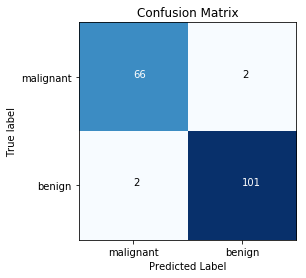

In [114]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)

ax.set(xticks=np.arange(cm.shape[0]),
       yticks=np.arange(cm.shape[0]),
       title = "Confusion Matrix",
       ylabel = "True label",
       xlabel = "Predicted Label",
       xticklabels = classLabels,
       yticklabels = classLabels
      )

for i in range(2):
  for j in range(2):
    ax.text(i, j, cm[j, i],
           color="white" if i==j else "black")

plt.show()

Now, it is much more easier to intepret. As the name suggested, a confusion matrix describes the performance of a model by tabulating the true label or class against the predicted label or class and shows the number of times the model was confused and predicted wrong class. In this case, the number of times our model has correctly identified "Malignant" is 66 and that of "Benign" is 101. However in 2 cases our model has predicted "benign" when the corresponding true class was "Malignant". Similarly, for 2 of the examples with ground-truth class as "benign", our model has predicted "Malignant".

Let's assume that the examples with class "malignant" as positive class and "benign" as negative class. Then, the number of times our model has correctly identified "malignant" are called **True Positives** and for "Benign" the number of correctly identified examples are called **True Negatives**. Likewise, the number of instances where our model has incorrectly identified "Malignant" as "Benign" are called **False Negative**. Similarly the number of instances where our model predicted "Malignant" when the actual class was "Benign" are called **False Positive**.

Hence, we have the following numbers:

True Positives (TP) = 66

True Negatives (TN) = 101

False Positives (FP) = 2

False Negatives (FN) = 2

On the basis of these numbers, we can calculate a bunch of other meaningful statistics. Some of them are:

1) Accuracy (overall accuracy of our model)  = $\frac{(TP + TN)}{(P + N)}$
= $\frac{66 + 101}{171}$ = 0.9766 

2) Misclassification Rate (How often our model is wrong?) = $\frac{(FP + FN)}{(P + N)}$
= $\frac{2 + 2}{171}$ = 0.0233 = 1-accuracy

3) True Positive Rate (also called as sensitivity or recall), TPP (Correctly identified) = $\frac{TP}{TP + FN}$
= $\frac{66}{68}$ = 0.9705 = 1 - FNR 

4) True Negative Rate (also called specificity, selectivity), TNR, (correctly rejected) = $\frac{TN}{TN + FP}$
= $\frac{101}{103}$ = 0.9805 = 1 - FPR

5) Positive Predictive value (PPV) or precision = $\frac{TP}{TP + FP}$
= $\frac{66}{68}$ = 0.9705

6) Negative Predicted value = $\frac{TN}{TN + FN}$
= $\frac{101}{103}$ = 0.9805 

7) False Negative Rate / miss rate (incorrectly rejected) = $\frac{FN}{FN + TP}$
= $\frac{2}{68}$ = 0.0294 

8) False Positive Rate / fall-out (incorrectly identified) = $\frac{FP}{TN + FP}$
= $\frac{2}{103}$ = 0.0194 

##Next
The confusion matrix itself is simple, however it might take some time to get used to with the various statistical measures, of the performance of a classifier. The most important take-away of this tutorial, if I had to say, would be the way confusion matrix enables us to describe the performance of the model and at the same time, helps us to calculate various other performance measures, that might be meaningful while evaluating the perdictive performance of a classifier.